In [215]:
import sklearn
import pandas as pd
import numpy as np

In [216]:
flag_source_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'
names=('name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft',  'botright')

In [287]:
df = pd.read_csv(flag_source_url, names=names)
df = df[['name', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'bars', 'stripes', 'circles']]

In [288]:
flag_df = pd.read_csv('./Country_Flags.csv')
d = dict(enumerate(flag_df['Country'].values))
table = dict(zip(d.values(), d.keys()))

In [289]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition, manifold
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

In [290]:
index = np.array([n in table for n in df['name'].values])
labels = df['name'].values[index]

In [291]:
X = df.copy()
del X['name']
X = X.values[index]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

/Users/argon/anaconda3/envs/dev/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [301]:
isomap = manifold.Isomap(n_neighbors=22, n_components=2)
X_isomap = isomap.fit_transform(X)

<IPython.core.display.Javascript object>


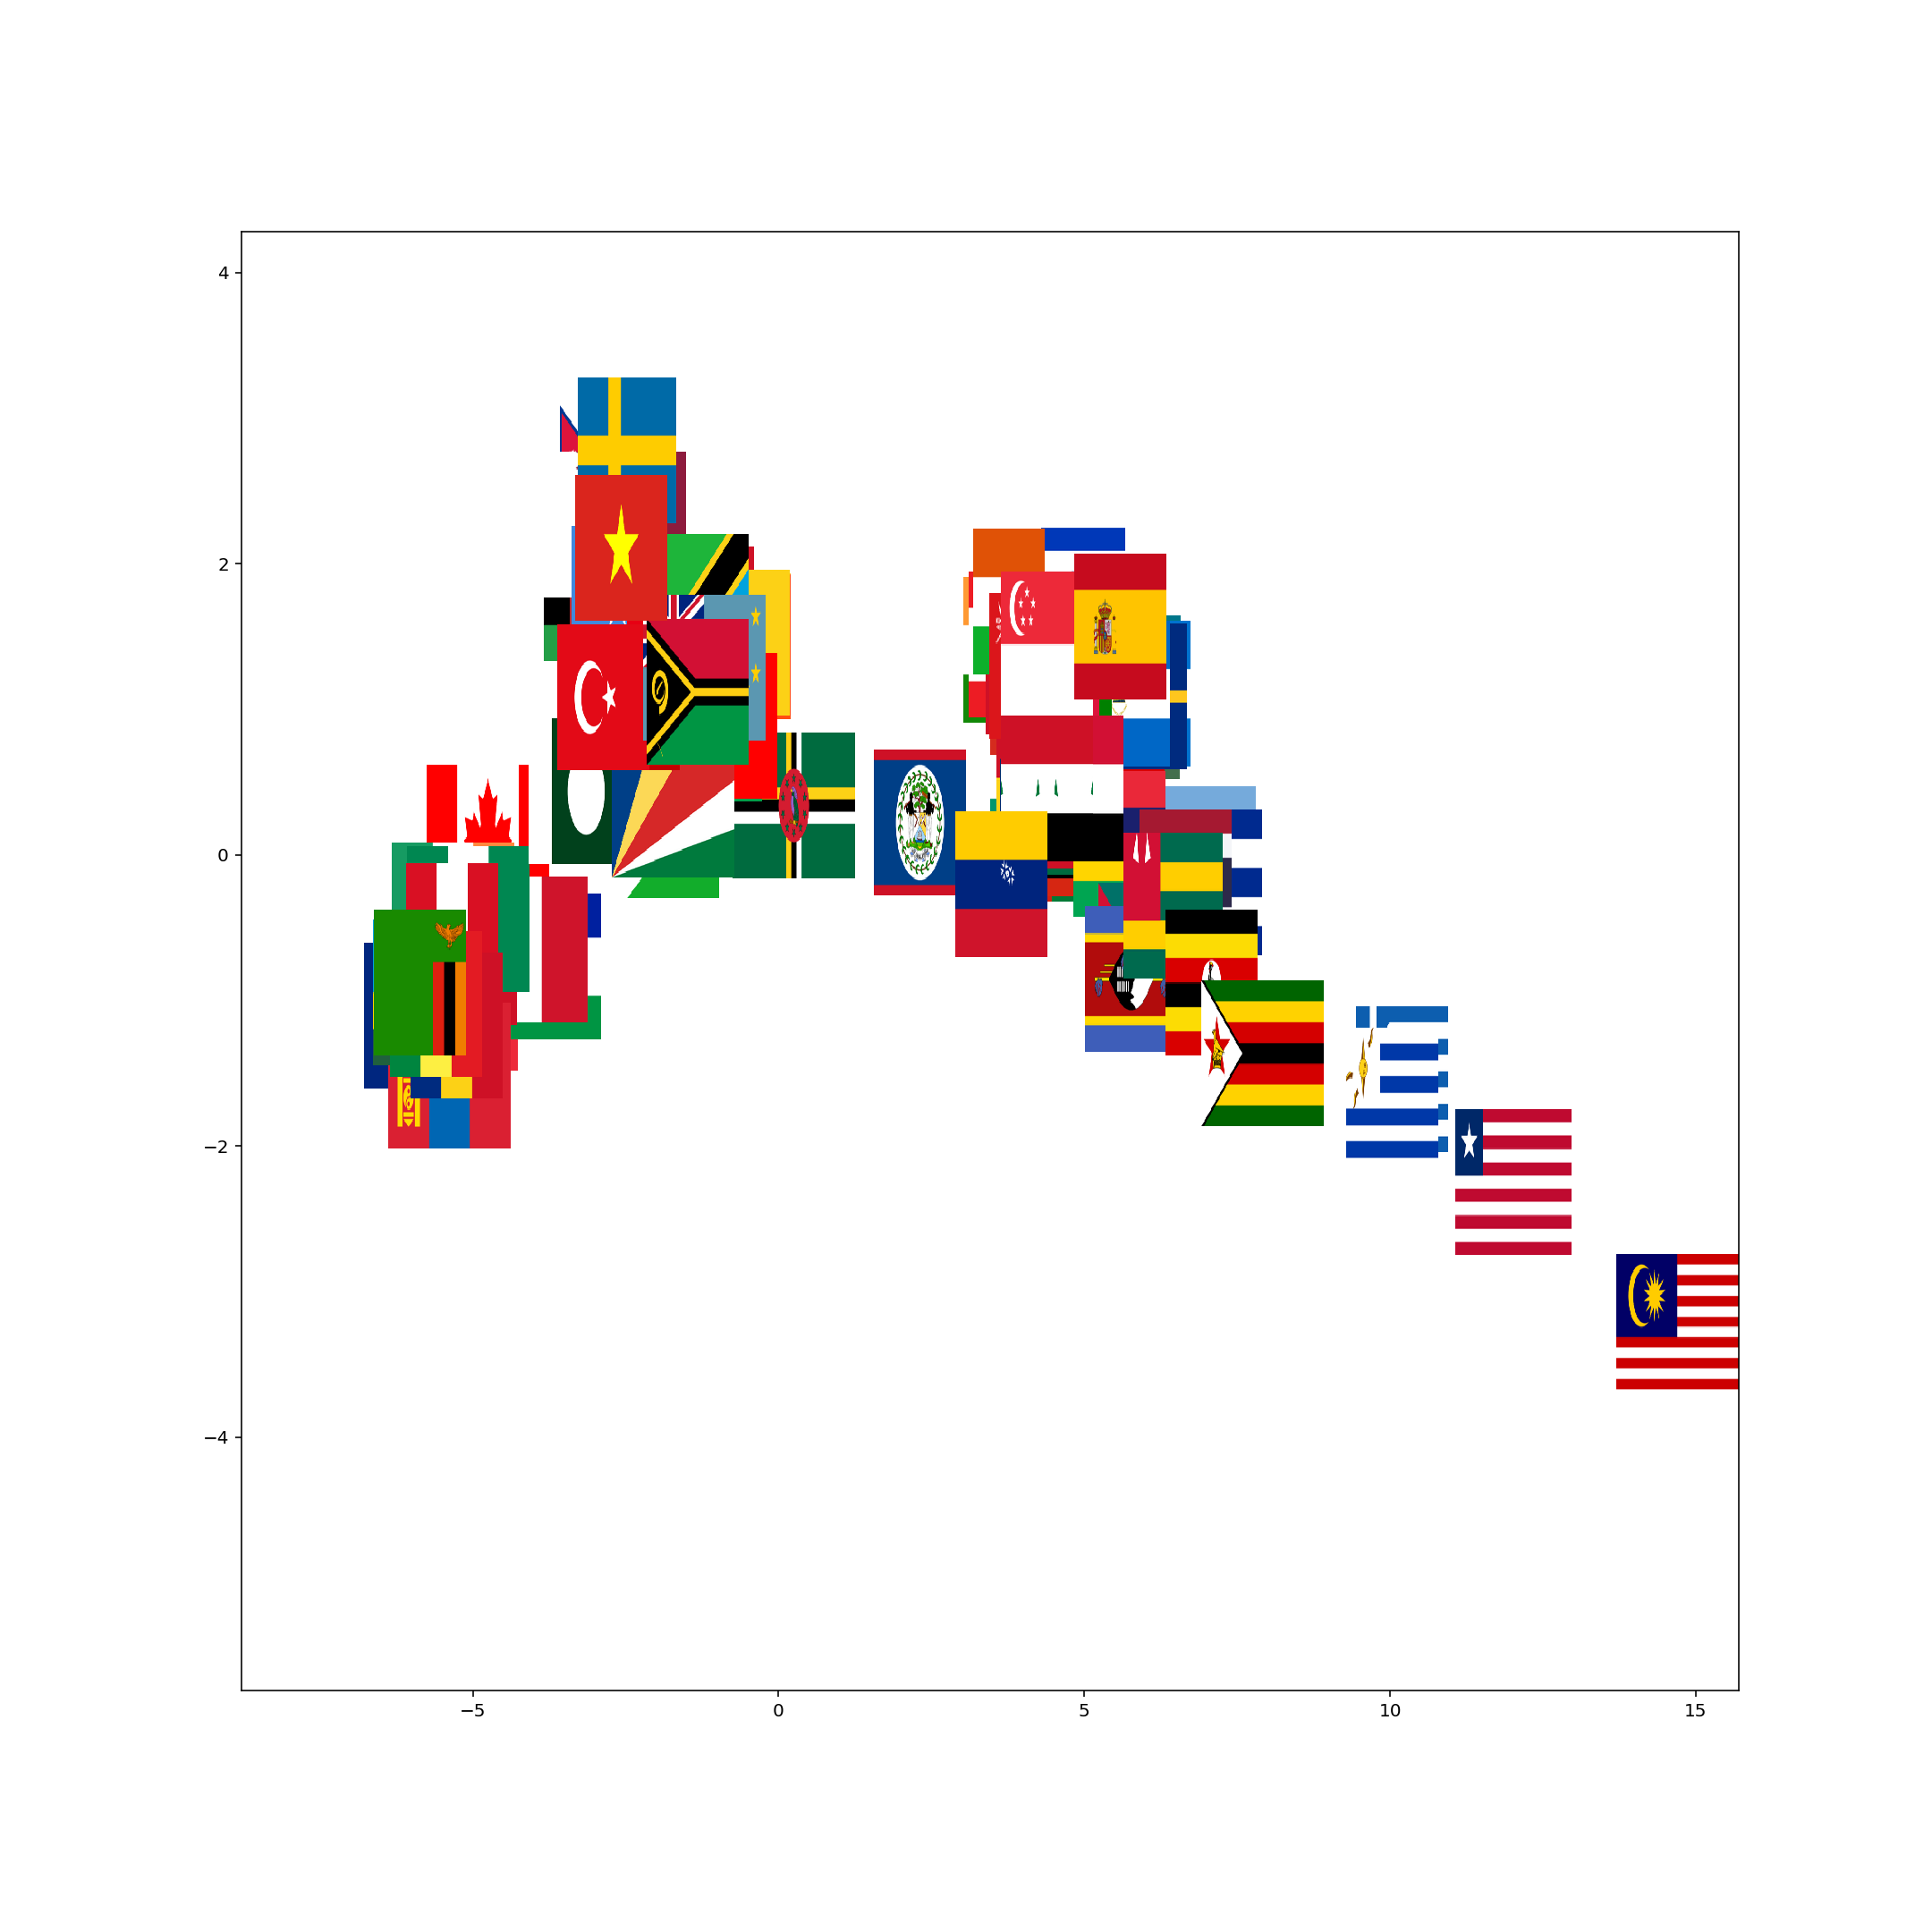

In [305]:
%matplotlib notebook
import os

n = X_isomap.shape[0]
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
xlim = [X_isomap[:,0].min()-2, X_isomap[:,0].max()+2]
ylim = [X_isomap[:,1].min()-2, X_isomap[:,1].max()+2]
for v, l in zip(X_isomap[:n], labels[:n]):
    fn = os.path.join('.', 'assets', '{}.png'.format(l))
    img = plt.imread(fn, format='png')
    vvv = img.shape[1] / img.shape[0]
    
    bb = Bbox.from_bounds(v[0], v[1], vvv, 1)
    bb2 = TransformedBbox(bb, ax.transData)
    bbox_image = BboxImage(bb2, norm=None, origin=None, clip_on=False)
    bbox_image.set_data(img)
    ax.add_artist(bbox_image)
ax.set_ylim(*ylim)
ax.set_xlim(*xlim)
plt.show()

In [306]:
plt.savefig('map.png')